In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,normalize,OneHotEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor
import time

In [3]:
df=fetch_california_housing()
x,y=df.data,df.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
N_observations,N_features=x.shape
print("Number of Observations: "+str(N_observations))
print("Number of Features: "+str(N_features))

Number of Observations: 20640
Number of Features: 8


In [5]:
n_estimators=100
rf=RandomForestRegressor(n_estimators=n_estimators,random_state=42)
xgb=XGBRegressor(n_estimators=n_estimators,random_state=42)


In [6]:
start_time_rf=time.time()
rf.fit(x_train,y_train)
end_time_rf=time.time()
rf_train_time=end_time_rf-start_time_rf

start_time_xgb=time.time()
xgb.fit(x_train,y_train)
end_time_xgb=time.time()
xgb_train_time=end_time_xgb-start_time_xgb

In [7]:
print(rf_train_time)
print(xgb_train_time)

15.953389644622803
0.5904445648193359


In [8]:
start_time_rf=time.time()
y_pred_rf=rf.predict(x_test)
end_time_rf=time.time()
rf_test_time=end_time_rf-start_time_rf

start_time_xgb=time.time()
y_pred_xgb=xgb.predict(x_test)
end_time_xgb=time.time()
xgb_test_time=end_time_xgb-start_time_xgb

In [9]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
r2_rf=r2_score(y_test,y_pred_rf)
r2_xgb=r2_score(y_test,y_pred_xgb)

In [10]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2554, R^2 = 0.8051
XGBoost:  MSE = 0.2226, R^2 = 0.8301


In [11]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_test_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_test_time:.3f} seconds')

Random Forest:  Training Time = 15.953 seconds, Testing time = 0.179 seconds
      XGBoost:  Training Time = 0.590 seconds, Testing time = 0.009 seconds


In [12]:
std_y=np.std(y_test)
std_y

np.float64(1.1447309632576992)

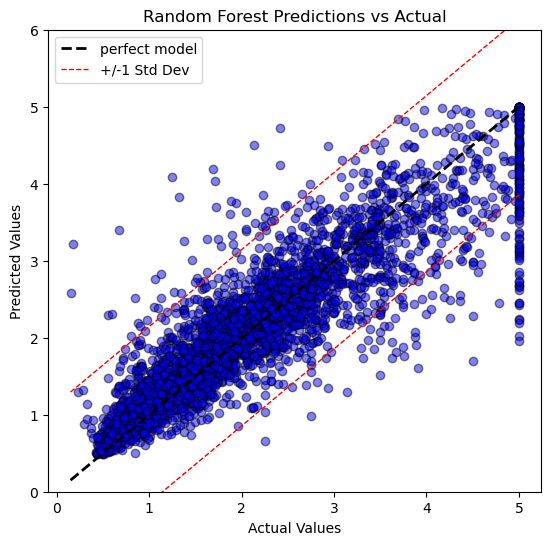

In [13]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

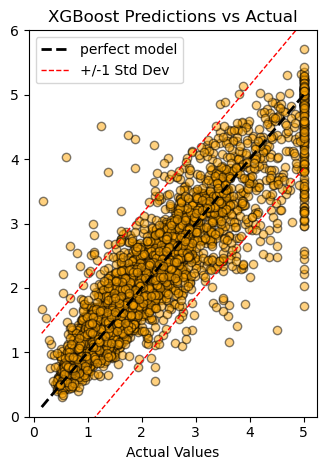

In [14]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()